In [1]:
#import libraries and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [36]:
#view structure
df.head(); df.info(); df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family_Size  891 non-null    int64  
 13  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [37]:
#to clean missing values
import pandas as pd

df = pd.read_csv('train.csv') 

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


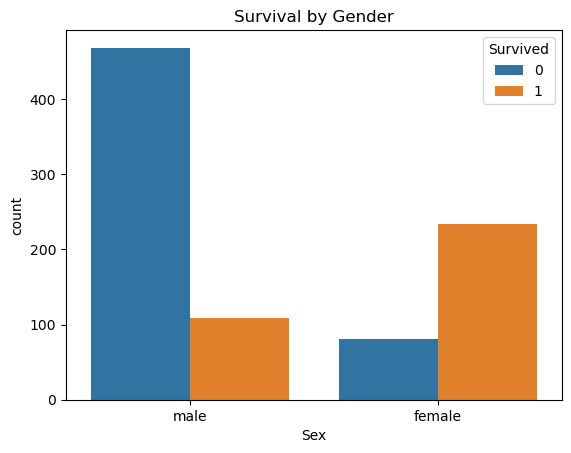

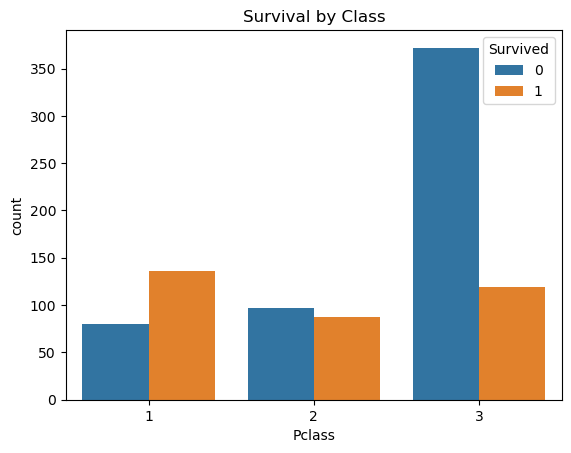

In [10]:
#count plots
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()


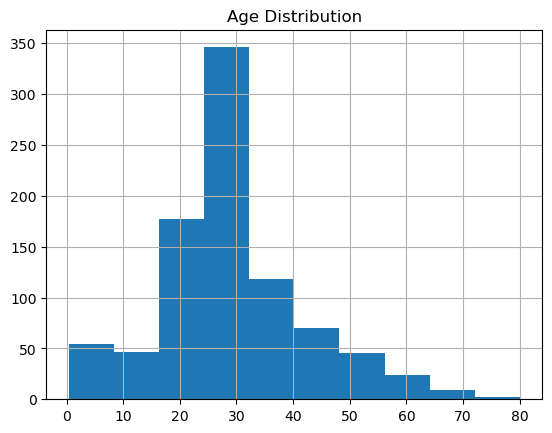

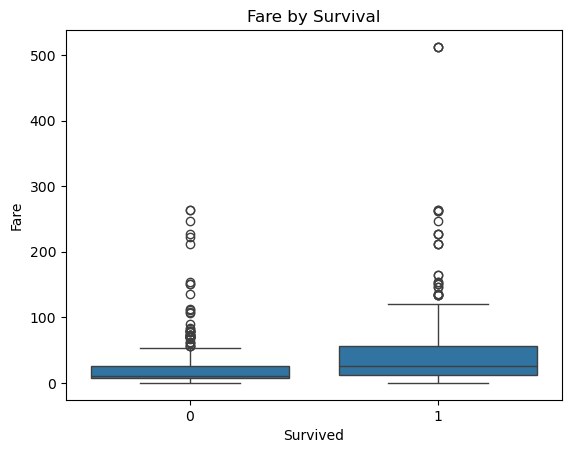

In [11]:
#Histograms and box plots
df['Age'].hist(bins=10)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.show()


In [16]:
#to check missing values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

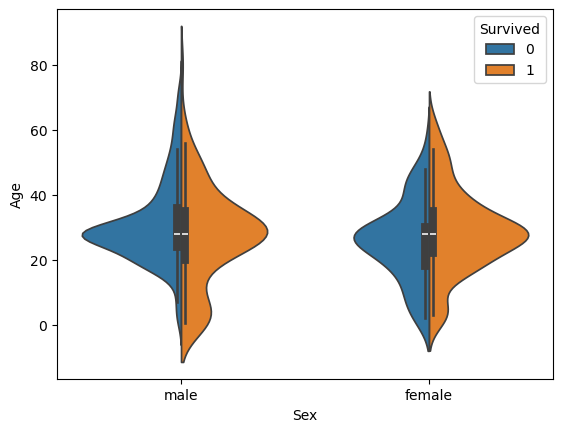

In [21]:

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)


<Axes: xlabel='Embarked', ylabel='Fare'>

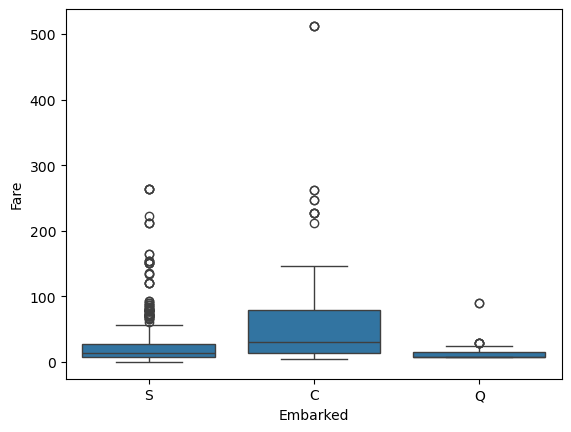

In [23]:
sns.boxplot(x='Embarked', y='Fare', data=df)


<Axes: xlabel='Survived', ylabel='Pclass'>

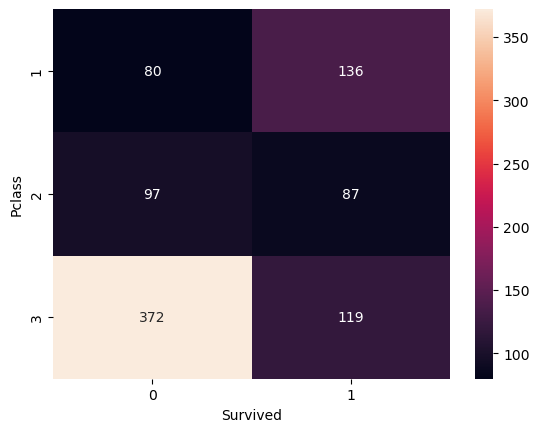

In [24]:
#age vs survival
df[['Age','Fare']].corr()
sns.heatmap(df[['Pclass','Survived']].groupby(['Pclass','Survived']).size().unstack(), annot=True, fmt='d')


In [34]:
#feature engineering
import pandas as pd

df = pd.read_csv('train.csv')
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Alone'] = (df['Family_Size'] == 1).astype(int)

print(df[['SibSp', 'Parch', 'Family_Size', 'Alone']].head())


   SibSp  Parch  Family_Size  Alone
0      1      0            2      0
1      1      0            2      0
2      0      0            1      1
3      1      0            2      0
4      0      0            1      1
